# Matplotlib

Commonly use a sub-library called `matplotlib.pyplot`.
The Jupyter Notebook will render plots inline by default.

Text(0, 0.5, 'Position (km)')

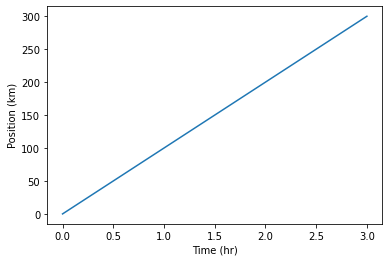

In [1]:
import matplotlib.pyplot as plt

time = [0, 1, 2, 3]
position = [0, 100, 200, 300]

plt.plot(time, position)
plt.xlabel('Time (hr)')
plt.ylabel('Position (km)')

we can also plot Pandas dataframes. This implicitly uses `matplotlib.pyplot`. Before plotting, we convert the column headings from a `string` to `integer` data type, since they represent numerical values.

In [2]:
import pandas as pd
data = pd.read_csv('data/gapminder_gdp_oceania.csv', index_col='country')
data

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,
Australia,10039.59564,10949.64959,12217.22686,14526.12465,16788.62948,18334.19751,19477.00928,21888.88903,23424.76683,26997.93657,30687.75473,34435.36744
New Zealand,10556.57566,12247.39532,13175.67800,14463.91893,16046.03728,16233.71770,17632.41040,19007.19129,18363.32494,21050.41377,23189.80135,25185.00911


In [3]:
data.columns

Index(['gdpPercap_1952', 'gdpPercap_1957', 'gdpPercap_1962', 'gdpPercap_1967',
       'gdpPercap_1972', 'gdpPercap_1977', 'gdpPercap_1982', 'gdpPercap_1987',
       'gdpPercap_1992', 'gdpPercap_1997', 'gdpPercap_2002', 'gdpPercap_2007'],
      dtype='object')

In [4]:
years = data.columns.str.strip('gdpPercap_')
years

Index(['1952', '1957', '1962', '1967', '1972', '1977', '1982', '1987', '1992',
       '1997', '2002', '2007'],
      dtype='object')

In [5]:
data.columns = years.astype(int)
data

,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
Australia,10039.59564,10949.64959,12217.22686,14526.12465,16788.62948,18334.19751,19477.00928,21888.88903,23424.76683,26997.93657,30687.75473,34435.36744
New Zealand,10556.57566,12247.39532,13175.67800,14463.91893,16046.03728,16233.71770,17632.41040,19007.19129,18363.32494,21050.41377,23189.80135,25185.00911


<AxesSubplot:>

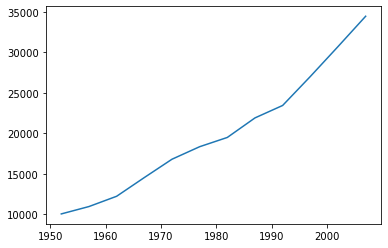

In [6]:
data.loc['Australia'].plot()

Text(0, 0.5, 'GDP per capita')

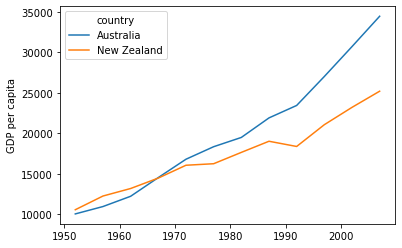

In [7]:
data.T.plot()
plt.ylabel('GDP per capita')

Many styles of plot are available.

Text(0, 0.5, 'GDP per capita')

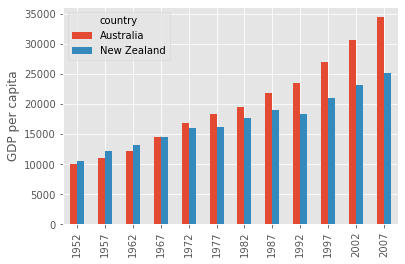

In [8]:
plt.style.use('ggplot')
data.T.plot(kind='bar')
plt.ylabel('GDP per capita')

Data can be plotted by calling the `plt.plot(x,y)`. The color and format of markers can also be specified as an additional optional argument, e.g., `b-` is a blue line, `g--` is a green dashed line.

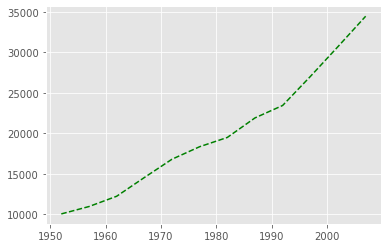

In [9]:
years = data.columns
gdp_australia = data.loc['Australia']
plt.plot(years, gdp_australia, 'g--')

Can plot many sets of data together. Often when plotting multiple datasets on the same figure it is desirable to have a legend describing the data. This can be done in two stages:

- provide a label for each dataset in the figure: `plt.plot(x, y, label='...')
- call `plt.legend()`

By default `matplotlib` will attempt to place the legend in a suitable position. If you would rather specify a position this can be done with the `loc=` argument, e.g. to place the legend in the upper left corner of the plot, specify `loc='upper left'`.

Text(0, 0.5, 'GDP per capita ($)')

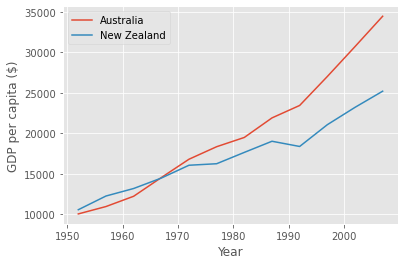

In [10]:
plt.plot(years, data.loc['Australia'], label='Australia')
plt.plot(years, data.loc['New Zealand'], label='New Zealand')
plt.legend()
plt.xlabel('Year')
plt.ylabel('GDP per capita ($)')

Plot a *scatter* plot correlating the datasets using either `plt.scatter()` or `Dataframe.plot.scatter()`.

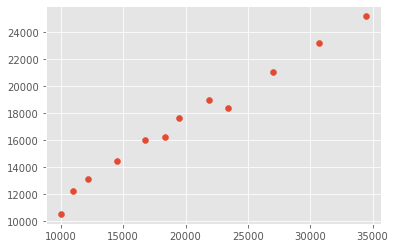

In [11]:
plt.scatter(data.loc['Australia'], data.loc['New Zealand'])

<AxesSubplot:xlabel='Australia', ylabel='New Zealand'>

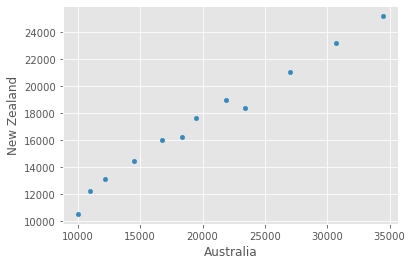

In [12]:
data.T.plot.scatter(x = 'Australia', y = 'New Zealand')

Minima and Maxima

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(-2.0, 0, 'gdpPercap_2002'),
  Text(0.0, 0, 'gdpPercap_1952'),
  Text(2.0, 0, 'gdpPercap_1962'),
  Text(4.0, 0, 'gdpPercap_1972'),
  Text(6.0, 0, 'gdpPercap_1982'),
  Text(8.0, 0, 'gdpPercap_1992'),
  Text(10.0, 0, 'gdpPercap_2002'),
  Text(12.0, 0, '')])

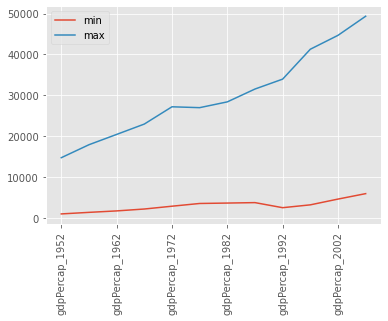

In [13]:
data_europe = pd.read_csv('data/gapminder_gdp_europe.csv', index_col='country')
data_europe.min().plot(label='min')
data_europe.max().plot(label='max')
plt.legend()
plt.xticks(rotation=90)

create a scatter plot showing the relationship between the minimum and maximum GDP per capita among the countries in Asia for each year in the data set.

<AxesSubplot:xlabel='min', ylabel='max'>

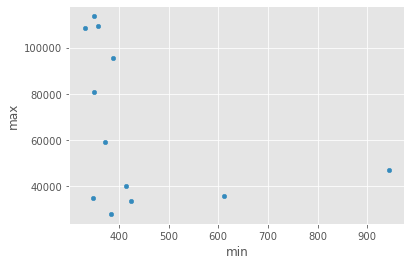

In [14]:
data_asia = pd.read_csv('data/gapminder_gdp_asia.csv', index_col='country')
data_asia.describe().T.plot(kind='scatter', x='min', y='max')


No particular correlations can be seen between the minimum and maximum gdp values year on year. It seems the fortunes of asian countries do not rise and fall together.

In [15]:
data_asia.describe().T

,count,mean,std,min,25%,50%,75%,max
gdpPercap_1952,33.0,5195.484004,18634.890865,331.0,749.681655,1206.947913,3035.326002,108382.35290
gdpPercap_1957,33.0,5787.732940,19506.515959,350.0,793.577415,1547.944844,3290.257643,113523.13290
gdpPercap_1962,33.0,5729.369625,16415.857196,388.0,825.623201,1649.552153,4187.329802,95458.11176
gdpPercap_1967,33.0,5971.173374,14062.591362,349.0,836.197138,2029.228142,5906.731805,80894.88326
gdpPercap_1972,33.0,8187.468699,19087.502918,357.0,1049.938981,2571.423014,8597.756202,109347.86700
gdpPercap_1977,33.0,7791.314020,11815.777923,371.0,1175.921193,3195.484582,11210.089480,59265.47714
gdpPercap_1982,33.0,7434.135157,8701.176499,424.0,1443.429832,4106.525293,12954.791010,33693.17525
gdpPercap_1987,33.0,7608.226508,8090.262765,385.0,1704.686583,4106.492315,11643.572680,28118.42998
gdpPercap_1992,33.0,8639.690248,9727.431088,347.0,1785.402016,3726.063507,15215.657900,34932.91959
gdpPercap_1997,33.0,9834.093295,11094.180481,415.0,1902.252100,3645.379572,19702.055810,40300.61996


Whilst Myanmar consistently has the lowest gdp, the highest gdb nation has varied more notably.

gdpPercap_1952          Kuwait
gdpPercap_1957          Kuwait
gdpPercap_1962          Kuwait
gdpPercap_1967          Kuwait
gdpPercap_1972          Kuwait
gdpPercap_1977          Kuwait
gdpPercap_1982    Saudi Arabia
gdpPercap_1987          Kuwait
gdpPercap_1992          Kuwait
gdpPercap_1997          Kuwait
gdpPercap_2002       Singapore
gdpPercap_2007          Kuwait
dtype: object
gdpPercap_1952    Myanmar
gdpPercap_1957    Myanmar
gdpPercap_1962    Myanmar
gdpPercap_1967    Myanmar
gdpPercap_1972    Myanmar
gdpPercap_1977    Myanmar
gdpPercap_1982    Myanmar
gdpPercap_1987    Myanmar
gdpPercap_1992    Myanmar
gdpPercap_1997    Myanmar
gdpPercap_2002    Myanmar
gdpPercap_2007    Myanmar
dtype: object


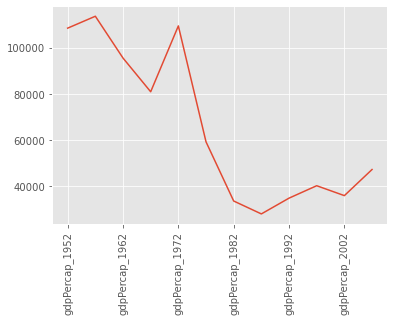

In [16]:
data_asia.max().plot()
plt.xticks(rotation=90)
print(data_asia.idxmax())
print(data_asia.idxmin())

creates a plot showing the correlation between GDP and life expectancy for 2007, normalizing marker size by population:

<AxesSubplot:xlabel='gdpPercap_2007', ylabel='lifeExp_2007'>

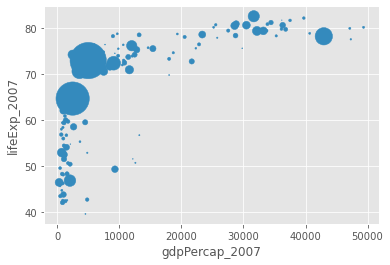

In [17]:
data_all = pd.read_csv('data/gapminder_all.csv', index_col='country')
data_all.plot(kind='scatter', x='gdpPercap_2007', y='lifeExp_2007',
              s=data_all['pop_2007']/1e6)

Arguments of `plt.plot()`:

- `kind`: determines the kind of plot to be drawn
- `x` and `y`: a column name or index that determines what data will be placed on the x and y axes of the plot
- `s`: a single number or one value for each data; determines the size of the plotted points